# Assignment 02 — Random Local Search Algorithm
This notebook implements the **Random Local Search / Random Search** algorithm (as in the provided skeleton)
and applies it to minimize

\[
g(w_1,w_2) = \tanh(4w_1 + 4w_2) + \max(0,4w_2^2) + 1
\]

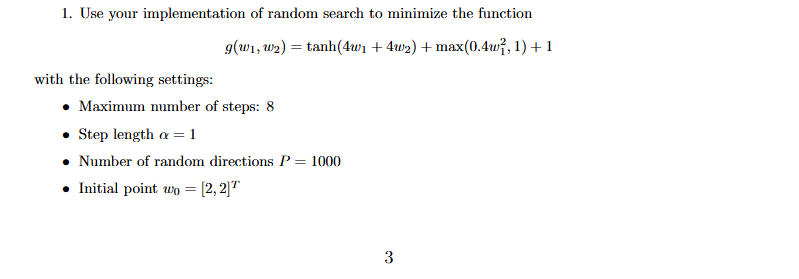

**Settings**
- Maximum number of steps: **8**
- Step length: **α = 1**
- Number of random directions: **P = 1000**
- Initial point: **w₀ = [2, 2]ᵀ**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 12})


## 1) Define the objective function g(w)
We represent a point as `w = np.array([w1, w2])`.


In [2]:
def g(w: np.ndarray) -> float:
    # Objective function g(w1,w2)
    w1, w2 = float(w[0]), float(w[1])
    return np.tanh(4*w1 + 4*w2) + max(0.0, 4*(w2**2)) + 1.0

print("g([2,2]) =", g(np.array([2.0, 2.0])))


g([2,2]) = 17.999999999999975


## 2) Implement Random Local Search (Random Search)

Algorithm steps (filled from the skeleton):
1. At the current point `w`, sample `P` random **unit** directions.
2. Create candidates `w + α * d` for each direction `d`.
3. Evaluate `g` on all candidates.
4. If the best candidate **improves** the cost, move to it; otherwise keep `w`.
5. Record the history of points and costs.


In [ ]:
# random search function
def random_search(g, alpha, max_its, w, num_samples, seed=0):
    # run random search
    weight_history = []   # container for weight history
    cost_history = []     # container for corresponding cost function history
    alpha = 0

    rng = np.random.default_rng(seed)
    w = np.array(w, dtype=float).reshape(-1)  # ensure vector

    for k in range(1, max_its + 1):
        # record weights and cost evaluation
        weight_history.append(w.copy())
        cost_history.append(g(w))

        # -----------------------------
        # construct set of random unit directions  (TO DO)
        # -----------------------------
        directions = rng.standard_normal(size=(num_samples, w.size))
        norms = np.linalg.norm(directions, axis=1, keepdims=True)
        norms = np.where(norms == 0, 1.0, norms)      # safety
        directions = directions / norms               # unit vectors

        # -----------------------------
        # pick best descent direction (TO DO)
        # compute all candidate points
        # -----------------------------
        w_candidates = w + alpha * directions

        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # best candidate index
        ind = int(np.argmin(evals))

        # -----------------------------
        # check directions to ensure a real descent direction (TO DO)
        # take the step only if it improves the cost
        # -----------------------------
        if evals[ind] < g(w):
            w = w_candidates[ind].copy()

    # record final weights and cost evaluation
    weight_history.append(w.copy())
    cost_history.append(g(w))

    return weight_history, cost_history


## 3) Run the algorithm with the required settings


In [ ]:
max_its = 8
alpha = 1.0
P = 1000
w0 = np.array([2.0, 2.0])

weight_history, cost_history = random_search(g, alpha=alpha, max_its=max_its, w=w0, num_samples=P, seed=0)

print("Final w:", weight_history[-1])
print("Final g(w):", cost_history[-1])

for i, (w, c) in enumerate(zip(weight_history, cost_history)):
    print(f"step {i:02d}: w = {w}, g(w) = {c:.6f}")


## 4) Visualize the optimization process (contours + path)

This replaces the `mlrefined` static plotter with a pure Matplotlib version.


In [ ]:
def contour_with_path(g, weight_history, xmin=-3.3, xmax=2.7, ymin=-5.0, ymax=3.0, num_contours=30, grid_n=250):
    xs = np.linspace(xmin, xmax, grid_n)
    ys = np.linspace(ymin, ymax, grid_n)
    X, Y = np.meshgrid(xs, ys)

    # evaluate g on grid
    Z = np.zeros_like(X, dtype=float)
    for i in range(grid_n):
        for j in range(grid_n):
            Z[i, j] = g(np.array([X[i, j], Y[i, j]]))

    plt.figure(figsize=(10, 7))
    cs = plt.contour(X, Y, Z, levels=num_contours)
    plt.clabel(cs, inline=True, fontsize=8)

    W = np.array(weight_history)
    plt.plot(W[:, 0], W[:, 1], marker="o")
    plt.title("Random Local Search Path on g(w1,w2)")
    plt.xlabel("w1")
    plt.ylabel("w2")
    plt.show()

contour_with_path(g, weight_history, num_contours=30, xmin=-3.3, xmax=2.7, ymin=-5, ymax=3)


## 5) Plot the cost value over iterations


In [ ]:
plt.figure(figsize=(9, 5))
plt.plot(range(len(cost_history)), cost_history, marker="o")
plt.title("Cost g(w) over iterations")
plt.xlabel("Iteration")
plt.ylabel("g(w)")
plt.grid(True)
plt.show()


## 6) Final answers (what to report)


In [ ]:
final_w = weight_history[-1]
final_cost = cost_history[-1]

print("Final point (w*):", final_w)
print("Final cost g(w*):", final_cost)
